In [2]:
import os

folder_path = "D:/7th/ml/0_major_project/testing_dataset" # Replace with the path to your folder
prefix = 'Test_image_'   # replace with name
start_number = 0     # change range here
end_number = 100

# List all files in the folder
file_list = os.listdir(folder_path)

# Sort the file list to ensure consistent order
file_list.sort()

# Initialize a counter for renaming
count = start_number

for filename in file_list:
    # Check if the file is an image (you can add more image extensions if needed)
    if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
        count += 1
        new_filename = os.path.join(folder_path, f'{prefix}{count}.jpg')
        os.rename(os.path.join(folder_path, filename), new_filename)
        print(f'Renamed: {filename} to {new_filename}')

        # Stop renaming when you reach the desired end_number
        if count == end_number:
            break

print('Renaming completed.')


Renamed: Test_image_10.jpg to D:/7th/ml/0_major_project/testing_dataset\Test_image_1.jpg


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'D:/7th/ml/0_major_project/testing_dataset\\Test_image_11.jpg' -> 'D:/7th/ml/0_major_project/testing_dataset\\Test_image_2.jpg'

## Augmentation

In [1]:
import os
import cv2
import numpy as np
import random

# Define the input and output directories
input_folder = "D:/0_FYP/archive/OralCancer/cancer/"
output_folder = "D:/7th/ml/0_major_project/augmented_images/"


# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# List the files in the input folder
input_files = os.listdir(input_folder)

# Parameters for data augmentation
scale_factors = [0.8, 1.2]  # Scaling factors (0.8x to 1.2x)
blur_strengths = [3, 5]  # Blurring strengths (kernel sizes)
color_ranges = [(0, 100), (50, 200)]  # Color change ranges (brightness)

# Loop through each image in the input folder
for input_file in input_files:
    input_path = os.path.join(input_folder, input_file)
    image = cv2.imread(input_path)

    # Randomly select augmentation parameters
    scale_factor = random.uniform(*scale_factors)
    # Ensure that the kernel size is an odd number
    blur_strength = random.randint(*blur_strengths)
    if blur_strength % 2 == 0:
        blur_strength += 1
    # Adjust the color range based on a random brightness factor
    brightness_factor = random.uniform(-1.5, 1.2)  # Adjust the range as needed
    color_range = (random.uniform(color_ranges[0][0], color_ranges[0][1]), random.uniform(color_ranges[1][0], color_ranges[1][1]))

    # Apply scaling
    scaled_image = cv2.resize(image, None, fx=scale_factor, fy=scale_factor)

    # Apply blurring with the corrected kernel size
    blurred_image = cv2.GaussianBlur(scaled_image, (blur_strength, blur_strength), 0)

    # Apply color change
    color_changed_image = cv2.convertScaleAbs(blurred_image, alpha=1, beta=random.uniform(color_range[0], color_range[1]))

    # Generate an output filename based on the input filename
    output_file = os.path.splitext(input_file)[0] + "_augmented.png"
    output_path = os.path.join(output_folder, output_file)

    # Save the augmented image
    cv2.imwrite(output_path, color_changed_image)

print("Data augmentation complete.")


Data augmentation complete.


In [5]:
import os
import cv2
import numpy as np
import random

# Define the input and output directories
input_folder = "D:/0_FYP/archive/OralCancer/non-cancer/"
output_folder = "D:/7th/ml/0_major_project/augmented_images/"

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# List the files in the input folder
input_files = os.listdir(input_folder)

# Parameters for data augmentation
scale_factors = [0.8, 1.2]  # Scaling factors (0.8x to 1.2x)
blur_strengths = [3, 5]  # Blurring strengths (kernel sizes)
color_ranges = [(0, 100), (50, 150)]  # Color change ranges (brightness)
rotation_angles = [-15, 15]  # Rotation angles (-15 degrees to 15 degrees)

# Loop through each image in the input folder
for input_file in input_files:
    input_path = os.path.join(input_folder, input_file)
    image = cv2.imread(input_path)

    # Generate an output filename based on the input filename
    base_filename = os.path.splitext(input_file)[0]

    # Augmentation loop
    num_augmentations = 3  # You can adjust this as needed
    for i in range(num_augmentations):
        # Randomly select augmentation parameters
        scale_factor = random.uniform(*scale_factors)
        # Ensure that the kernel size is an odd number
        blur_strength = random.randint(*blur_strengths)
        if blur_strength % 2 == 0:
            blur_strength += 1
        # Adjust the color range based on a random brightness factor
        brightness_factor = random.uniform(-1.5, 1.2)  # Adjust the range as needed
        color_range = (
            random.uniform(color_ranges[0][0], color_ranges[0][1]),
            random.uniform(color_ranges[1][0], color_ranges[1][1]),
        )
        # Randomly select rotation angle
        rotation_angle = random.uniform(*rotation_angles)

        # Apply scaling
        scaled_image = cv2.resize(image, None, fx=scale_factor, fy=scale_factor)

        # Apply blurring with the corrected kernel size
        blurred_image = cv2.GaussianBlur(scaled_image, (blur_strength, blur_strength), 0)

        # Apply color change
        color_changed_image = cv2.convertScaleAbs(blurred_image, alpha=1, beta=random.uniform(color_range[0], color_range[1]))

        # Apply rotation
        rotation_matrix = cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2), rotation_angle, 1)
        rotated_image = cv2.warpAffine(color_changed_image, rotation_matrix, (image.shape[1], image.shape[0]))

        # Generate an output filename based on the input filename and augmentation index
        output_file = f"{base_filename}_augmented_{i+1}.png"
        output_path = os.path.join(output_folder, output_file)

        # Save the augmented image
        cv2.imwrite(output_path, rotated_image)

print("Data augmentation complete.")


Data augmentation complete.


## GAN

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Reshape, Flatten, BatchNormalization, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import load_model


# Define the generator model
def build_generator(latent_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(28*28*1, activation='tanh'))
    model.add(Reshape((28, 28, 1)))
    return model

# Define the discriminator model
def build_discriminator(img_shape):
    model = Sequential()
    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Define the GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))
    return model

# Load and preprocess the images
def load_real_samples(folder_path):
    datagen = ImageDataGenerator(rescale=1./255)
    data_generator = datagen.flow_from_directory(
        folder_path,
        target_size=(28, 28),
        class_mode='binary',
        batch_size=64,
        color_mode='grayscale'
    )
    return data_generator

# Generate real samples
def generate_real_samples(dataset, n_samples):
    X, y = dataset.next()
    idx = np.random.randint(0, X.shape[0], n_samples)
    X = X[idx]
    y = y[idx]
    return X, y

# Generate random noise as input for the generator
def generate_latent_points(latent_dim, n_samples):
    x_input = np.random.randn(latent_dim * n_samples)
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

# Generate fake samples with the generator
def generate_fake_samples(generator, latent_dim, n_samples):
    x_input = generate_latent_points(latent_dim, n_samples)
    X = generator.predict(x_input)
    y = np.zeros((n_samples, 1))
    return X, y

# Train the GAN
def train_gan(generator, discriminator, gan_model, dataset, latent_dim, n_epochs=2000, n_batch=64, checkpoint_path="best_generator.h5"):
    half_batch = int(n_batch / 2)
    
    # Initialize best loss to a large value
    best_loss = float('inf')

    for epoch in range(n_epochs):
        # Train the discriminator
        X_real, y_real = generate_real_samples(dataset, half_batch)
        d_loss_real = discriminator.train_on_batch(X_real, y_real)
        
        X_fake, y_fake = generate_fake_samples(generator, latent_dim, half_batch)
        d_loss_fake = discriminator.train_on_batch(X_fake, y_fake)
        
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        
        # Train the generator
        X_gan = generate_latent_points(latent_dim, n_batch)
        y_gan = np.ones((n_batch, 1))
        
        g_loss = gan_model.train_on_batch(X_gan, y_gan)
        
        # Print progress
        if epoch % 100 == 0:
            print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100 * d_loss[1]}] [G loss: {g_loss}]")

            # Save the generator if the validation loss is the lowest so far
            if g_loss < best_loss:
                best_loss = g_loss
                generator.save(checkpoint_path)
            

            
# Define the size of the latent space
latent_dim = 150
# Assuming you have loaded the generator model like this
generator = load_model('best_generator.h5')

# Build and compile the discriminator
img_shape = (28, 28, 1)
discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

# Build the generator
generator = build_generator(latent_dim)

# Build and compile the GAN model
discriminator.trainable = False
gan_model = build_gan(generator, discriminator)

# Load and preprocess the dataset
folder_path = "D:/0_FYP/archive/OralCancer"
dataset = load_real_samples(folder_path)

# Train the GAN
train_gan(generator, discriminator, gan_model, dataset, latent_dim)


Found 238 images belonging to 2 classes.
1/1 [==============================] - 0s 150ms/step
0 [D loss: 0.6426587700843811 | D accuracy: 82.8125] [G loss: 1.0962451696395874]
1/1 [==============================] - 0s 25ms/step
100 [D loss: 0.20574573054909706 | D accuracy: 98.4375] [G loss: 6.057250499725342]
1/1 [==============================] - 0s 25ms/step
200 [D loss: 0.5778132826089859 | D accuracy: 79.6875] [G loss: 1.6364269256591797]
1/1 [==============================] - 0s 24ms/step
300 [D loss: 0.4876119792461395 | D accuracy: 84.375] [G loss: 2.2317452430725098]
1/1 [==============================] - 0s 25ms/step
400 [D loss: 0.4367033392190933 | D accuracy: 84.375] [G loss: 1.6592321395874023]
1/1 [==============================] - 0s 31ms/step
500 [D loss: 0.3589150011539459 | D accuracy: 87.5] [G loss: 1.7644248008728027]
1/1 [==============================] - 0s 25ms/step
600 [D loss: 0.4265422821044922 | D accuracy: 82.8125] [G loss: 1.5504374504089355]
1/1 [========

1/1 [==============================] - 0s 30ms/step


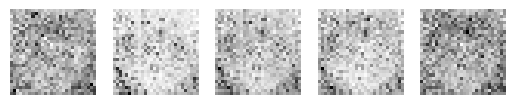

In [22]:
def generate_images(generator, latent_dim, n_samples=5):
    # Generate random noise
    noise = np.random.randn(latent_dim * n_samples)
    noise = noise.reshape(n_samples, latent_dim)

    # Generate images
    generated_images = generator.predict(noise)

    # Rescale pixel values to the original range [0, 1]
    generated_images = 0.5 * generated_images + 0.5

    return generated_images


# Generate and plot images
generated_images = generate_images(generator, latent_dim)

for i in range(generated_images.shape[0]):
    plt.subplot(1, generated_images.shape[0], i+1)
    plt.imshow(generated_images[i, :, :, 0], cmap='gray')
    plt.axis('off')

plt.show()
